In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import plotting_common

In [2]:
plotting_common.setup_plotting_style()

In [3]:
df_fxhash = pd.read_json("data/data-primes-k-fxhash.json")
df_badhash = pd.read_json("data/data-primes-k-with-bad-hashing.json")

total_negatives = 8402298293
total_positives = 187636299
total_normalized_positives = 23475688

for df in [df_fxhash, df_badhash]:
    df["rate_false_positives"] = df["false_positives"] / total_negatives
    del df["false_positives_in_one_past"]

df = df_fxhash.join(on=["size", "k"], other=df_badhash.set_index(["size", "k"]), validate="one_to_one", sort=True, rsuffix="_badhash")

df

,size,k,size_category,false_positives,rate_false_positives,size_category_badhash,false_positives_badhash,rate_false_positives_badhash
0,4194319,1,prime,8370500527,0.996216,prime,7706013755,0.917132
26,4194319,2,prime,8402079289,0.999974,prime,8217327330,0.977986
52,4194319,3,prime,8402298293,1.000000,prime,8363104288,0.995335
78,4194319,4,prime,8402298293,1.000000,prime,8395584077,0.999201
1,5007601,1,prime,8322072269,0.990452,prime,8333624415,0.991827
...,...,...,...,...,...,...,...,...
102,295052869,4,prime,49157131,0.005850,prime,562678258,0.066967
25,352263649,1,prime,476529367,0.056714,prime,476247604,0.056681
51,352263649,2,prime,116049058,0.013812,prime,509594244,0.060649
77,352263649,3,prime,45400792,0.005403,prime,491798945,0.058531


In [4]:
base_path = "../precompute/filters/hash/"

sizes = []

for row in df.iterrows():
    size = row[1]["size"]
    k = row[1]["k"]
    path = base_path + f"filter_{size:09}_{k}_norm.bin.br"
    sizes.append(os.path.getsize(path))

df["compressed_size_bytes"] = sizes


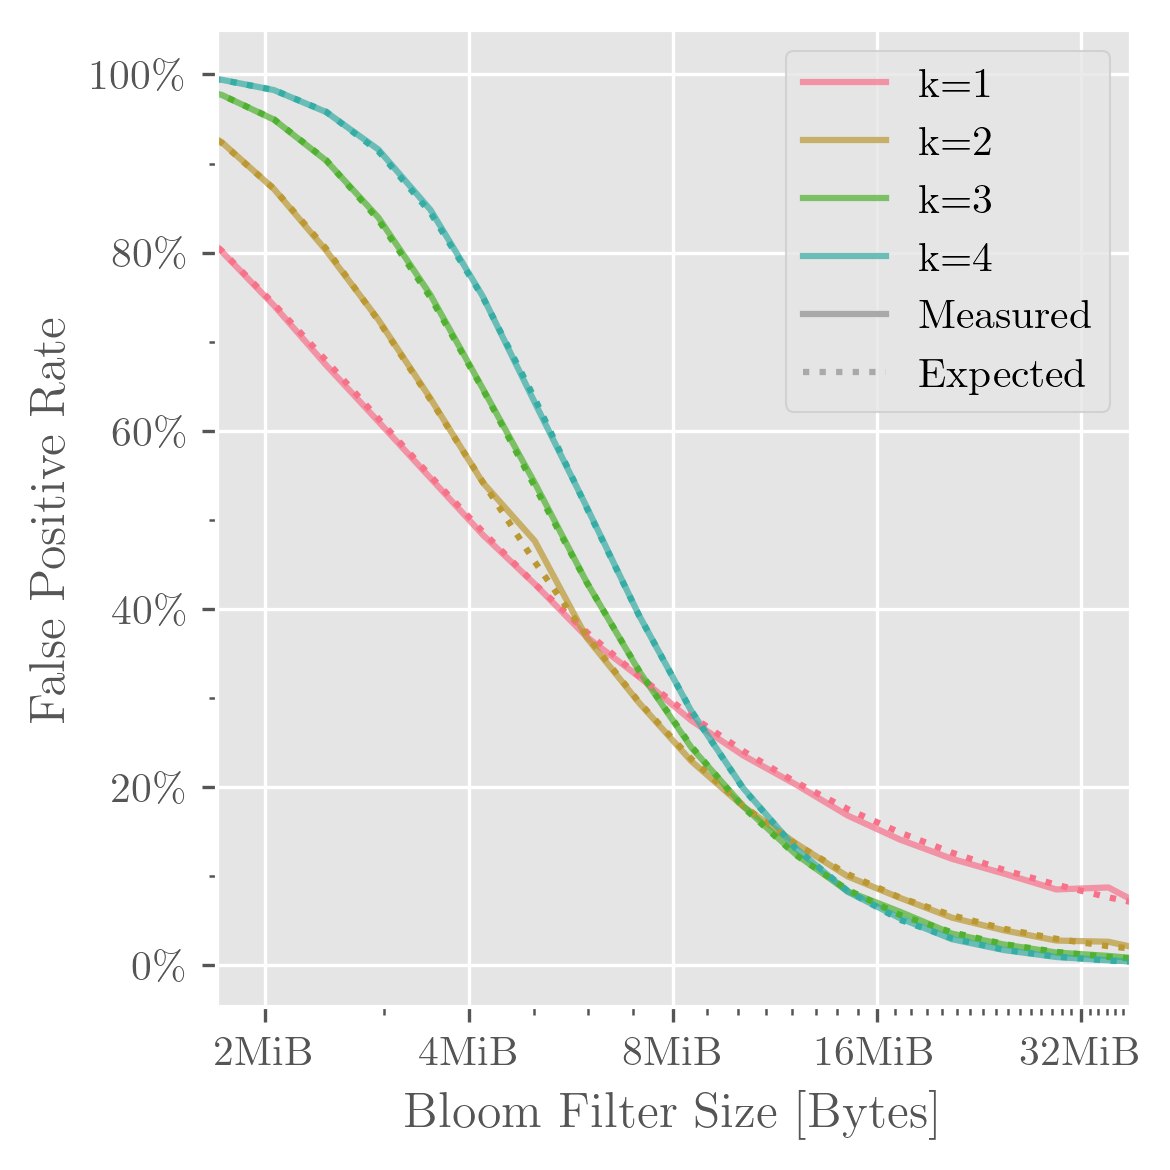

In [5]:
for k in range(1, 5):
    data = df[df["k"] == k]

    plt.plot(
        data["size"] / 8,
        data["rate_false_positives"] * 100,
        label=f"k={k}",
        color=plotting_common.colors[k - 1],
        alpha=0.7,
    )

    # plt.plot(
    #     data["size"] / 8,
    #     data["rate_false_positives_badhash"],
    #     linestyle="--",
    #     color=plotting_common.colors[k - 1],
    #     alpha=0.8,
    # )

x = df[df["k"] == k]["size"] / 8
for k in range(1, 5):
    m = x * 8
    n = 23475688
    p = (1 - np.exp(-k / (m / n))) ** k
    plt.plot(x, p * 100, ":", color=plotting_common.colors[k - 1])

plt.plot([], [], "-", label="Measured", color="darkgray")
# plt.plot([], [], "--", label="Prime Factors", color="darkgray")
plt.plot([], [], ":", label="Expected", color="darkgray")

plt.xscale("log")
plt.xlim(1.7 * 2**20, 38 * 2**20)


plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("False Positive Rate")
plt.gca().yaxis.set_ticks([10 * i for i in range(11)], minor=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: fr"{x:.0f}\%"))

plotting_common.setup_bytes_formatters(plt.gca().xaxis)
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gca().xaxis.set_ticks([m * 2**20 for m in range(2, 38)], minor=True)
plt.gcf().set_size_inches(4, 4)

plt.legend()
plt.tight_layout()
plt.savefig('../report/img/k.pdf')

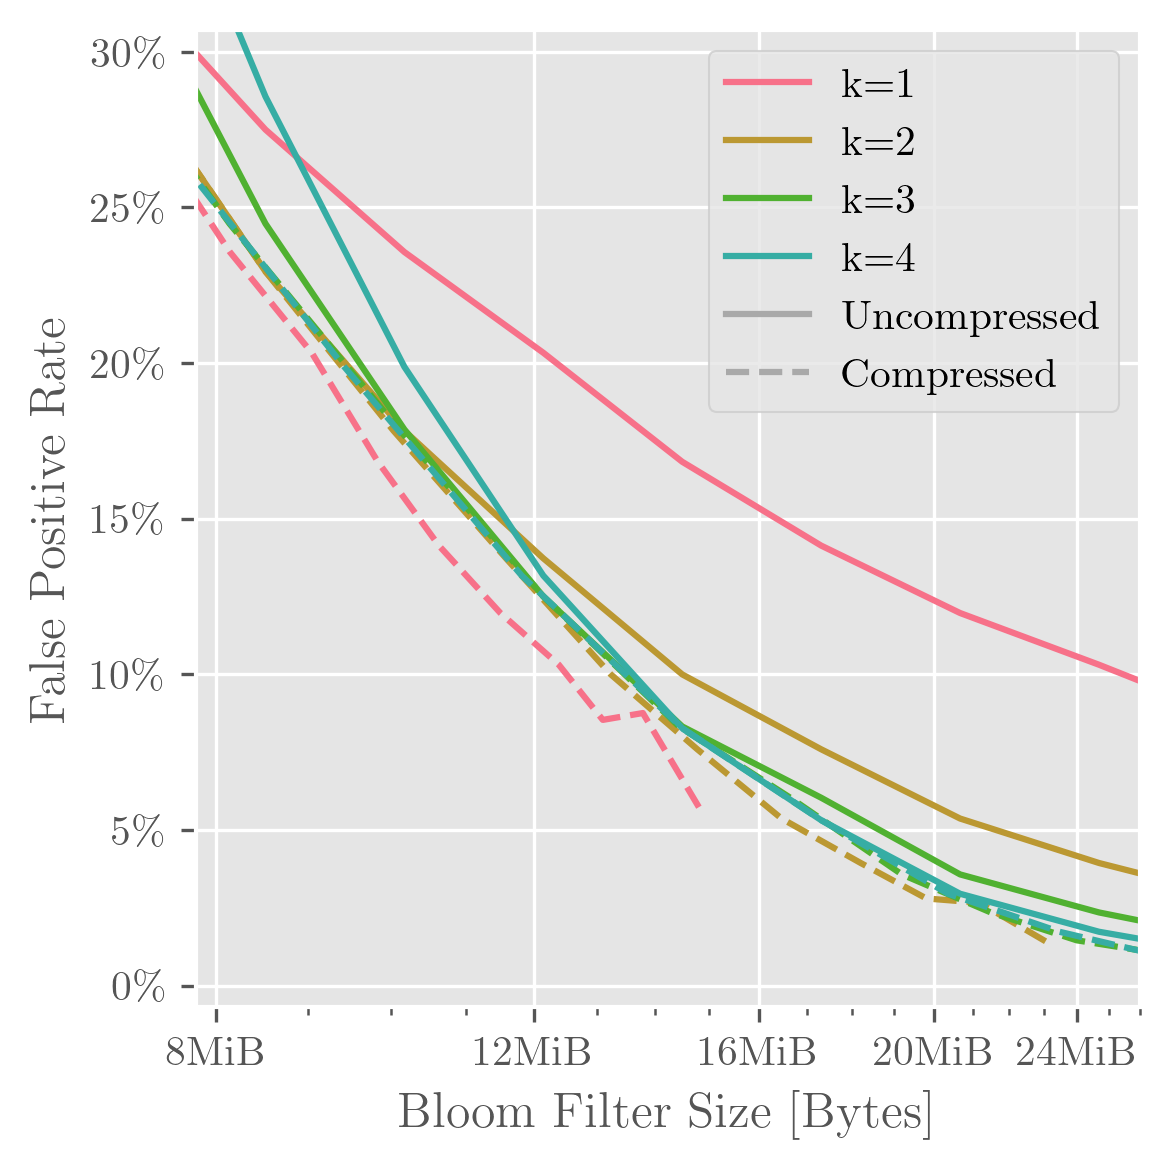

In [6]:
for k in range(1, 5):
    data = df[df["k"] == k]

    plt.plot(
        data["size"] / 8,
        data["rate_false_positives"] * 100,
        label=f"k={k}",
        color=plotting_common.colors[k - 1],
    )

    plt.plot(
        data["compressed_size_bytes"],
        data["rate_false_positives"] * 100,
        linestyle="--",
        color=plotting_common.colors[k - 1],
    )

plt.plot([], [], linestyle="-", color="darkgray", label="Uncompressed")
plt.plot([], [], linestyle="--", color="darkgray", label="Compressed")

plt.xscale("log")

plt.xlim(7.8 * 2**20, 18 * 2**20)
plt.ylim(-0.7, 30.7)

plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("False Positive Rate")
plt.gca().yaxis.set_ticks([i for i in range(0, 31, 5)], minor=False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: fr"{x:.0f}\%"))

plotting_common.setup_bytes_formatters(plt.gca().xaxis)
plt.gca().xaxis.set_ticks([m * 2**20 for m in [8, 12, 16, 20, 24]])
plt.gca().xaxis.set_ticks([m * 2**20 for m in range(8, 27)], minor=True)
plt.gcf().set_size_inches(4, 4)

plt.legend()
plt.tight_layout()
plt.savefig('../report/img/k-vs-compression.pdf')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


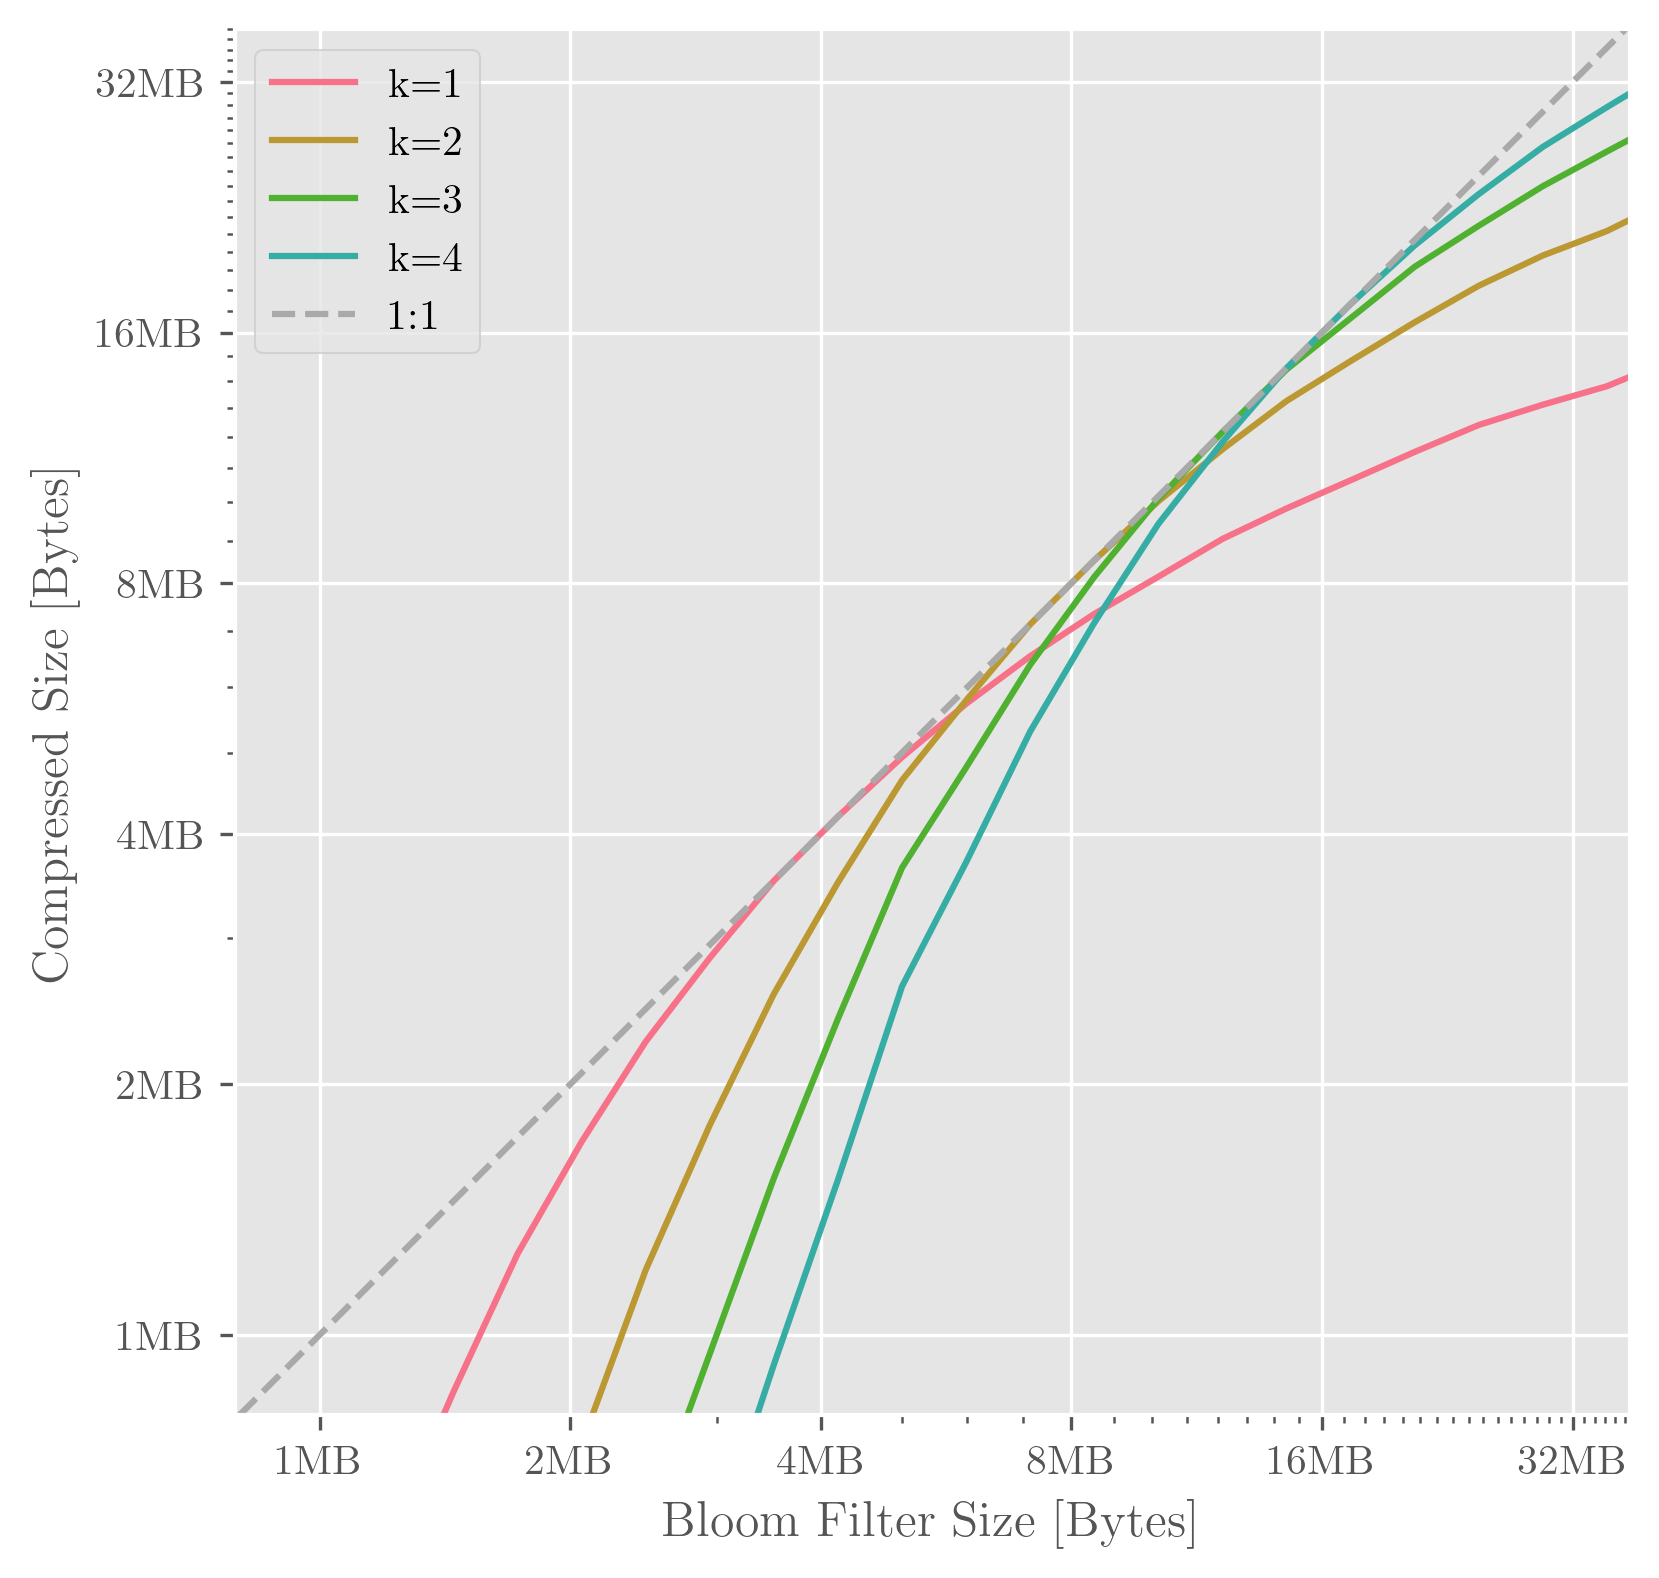

In [7]:
for k in range(1, 5):
    data = df[df["k"] == k]

    plt.plot(
        data["size"] / 8,
        data["compressed_size_bytes"],
        label=f"k={k}",
        color=plotting_common.colors[k - 1],
    )

plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("Compressed Size [Bytes]")
plt.gca().axis("equal")
plt.xscale("log")
plt.yscale("log")

plt.xlim(0.8 * 2**20, 37 * 2**20)
plt.ylim(0.8 * 2**20, 37 * 2**20)

plt.plot(
    [0.5 * 2**20, 40 * 2**20],
    [0.5 * 2**20, 40 * 2**20],
    "--",
    color="darkgray",
    label="1:1",
)


plotting_common.setup_bytes_formatters(plt.gca().xaxis)

for axis in [plt.gca().xaxis, plt.gca().yaxis]:
    plotting_common.setup_bytes_formatters(axis)
    axis.set_major_locator(plt.LogLocator(base=2))
    axis.set_ticks([m * 2**20 for m in range(1, 38)], minor=True)

plt.gcf().set_size_inches(6, 6)
_ = plt.legend()